# quantitative results

This notebook reproduces the quantitative results in the paper. We compute the predictions using the Microsoft Azure Face API (using which anybody can make 30k free API calls a month).

For convenience, we've supplied the pre-computed classifications in `./quant/predictions/*.pkl` files for both our method and the baseline methods. Alternatively, you can re-generate our synthetic images using the script provided and compute the classifications from scratch, to replicate the results.

In [1]:
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imageio import imread
from IPython.display import Image

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})

gt = pickle.load(open('./quant/predictions/gt.pkl', 'rb'))

# our pickles
hair = pickle.load(open('./quant/predictions/editC-ours.pkl', 'rb'))
yaw = pickle.load(open('./quant/predictions/editW-ours.pkl', 'rb'))
pitch = pickle.load(open('./quant/predictions/editH-ours.pkl', 'rb'))

# ganspace pickles
g_hair = pickle.load(open('./quant/predictions/gspace-editC.pkl', 'rb'))
g_yaw = pickle.load(open('./quant/predictions/gspace-editW.pkl', 'rb'))
g_pitch = pickle.load(open('./quant/predictions/gspace-editH.pkl', 'rb'))

# sefa pickles
s_hair = pickle.load(open('./quant/predictions/editC-sefa.pkl', 'rb'))
s_yaw = pickle.load(open('./quant/predictions/editW-sefa.pkl', 'rb'))
s_pitch = pickle.load(open('./quant/predictions/editH-sefa.pkl', 'rb'))

# unsup. pickles
b_gt = pickle.load(open('./quant/predictions/real-babenko.pkl', 'rb'))
b_hair = pickle.load(open('./quant/predictions/editC-babenko.pkl', 'rb'))
b_yaw = pickle.load(open('./quant/predictions/editW-babenko.pkl', 'rb'))
b_pitch = pickle.load(open('./quant/predictions/editH-babenko.pkl', 'rb'))

In [2]:
# define shared min and max attribute values for cmaps (visualisation purposes)
max_vals = [
    0.5,  # hair
    10,  # pitch
    25,  # yaw
]

union = lambda a, b, c, d: list(set(a) & set(b) & set(c) & set(d))

# build the prediction matrices $\mathbf{A}$

In [3]:
#######################################
# ours
#######################################
# get only images that have face recognised in both gt and edits
valid_keys = union(gt.keys(), hair.keys(), yaw.keys(), pitch.keys())

mat = np.eye(3)

num_samples = 0
for key in valid_keys:
    real = gt[key]
    fake_hair = hair[key]
    fake_pitch = pitch[key]
    fake_yaw = yaw[key]
    
    # for some images, hair colours are not returned
    if 'invisible' in[real['hair_color'], fake_hair['hair_color'], fake_pitch['hair_color'], fake_yaw['hair_color']] or \
        'bald' in[real['hair_color'], fake_hair['hair_color'], fake_pitch['hair_color'], fake_yaw['hair_color']]:
        continue
        
    mat[0, 0] += abs(fake_hair['hair_color']['blond'] - real['hair_color']['blond']) # how hair pred changes when we change hair attribute
    mat[0, 1] += abs(fake_hair['pitch'] - real['pitch']) # how pitch pred changes when we change hair attribute
    mat[0, 2] += abs(fake_hair['yaw'] - real['yaw']) # how yaw pred changes ... etc
    
    mat[1, 0] += abs(fake_pitch['hair_color']['blond'] - real['hair_color']['blond'])
    mat[1, 1] += abs(fake_pitch['pitch'] - real['pitch'])
    mat[1, 2] += abs(fake_pitch['yaw'] - real['yaw'])
    
    mat[2, 0] += abs(fake_yaw['hair_color']['blond'] - real['hair_color']['blond'])
    mat[2, 1] += abs(fake_yaw['pitch'] - real['pitch'])
    mat[2, 2] += abs(fake_yaw['yaw'] - real['yaw'])
    
    num_samples += 1

mat /= num_samples

In [4]:
#######################################
# SeFa
#######################################
# get only images that have face recognised in both gt and edits
valid_keys = union(gt.keys(), s_hair.keys(), s_yaw.keys(), s_pitch.keys())

mat_s = np.eye(3)

num_samples = 0
for key in valid_keys:
    real = gt[key]
    fake_hair = s_hair[key]
    fake_pitch = s_pitch[key]
    fake_yaw = s_yaw[key]
    
    # for some images, hair colours are not returned
    if 'invisible' in[real['hair_color'], fake_hair['hair_color'], fake_pitch['hair_color'], fake_yaw['hair_color']] or \
        'bald' in[real['hair_color'], fake_hair['hair_color'], fake_pitch['hair_color'], fake_yaw['hair_color']]:
        continue
    
    mat_s[0, 0] += abs(fake_hair['hair_color']['blond'] - real['hair_color']['blond']) # how hair pred changes when we change hair attribute
    mat_s[0, 1] += abs(fake_hair['pitch'] - real['pitch']) # how pitch pred changes when we change hair attribute
    mat_s[0, 2] += abs(fake_hair['yaw'] - real['yaw']) # how yaw pred changes ... etc
    
    mat_s[1, 0] += abs(fake_pitch['hair_color']['blond'] - real['hair_color']['blond'])
    mat_s[1, 1] += abs(fake_pitch['pitch'] - real['pitch'])
    mat_s[1, 2] += abs(fake_pitch['yaw'] - real['yaw'])
   
    mat_s[2, 0] += abs(fake_yaw['hair_color']['blond'] - real['hair_color']['blond'])
    mat_s[2, 1] += abs(fake_yaw['pitch'] - real['pitch'])
    mat_s[2, 2] += abs(fake_yaw['yaw'] - real['yaw'])
    
    num_samples += 1
    
mat_s /= num_samples

In [5]:
#######################################
# babenko
#######################################
# get only images that have face recognised in both gt and edits
valid_keys = union(b_gt.keys(), b_hair.keys(), b_yaw.keys(), b_pitch.keys())

mat_b = np.eye(3)

num_samples = 0
for key in valid_keys:
    real = b_gt[key]
    fake_hair = b_hair[key]
    fake_pitch = b_pitch[key]
    fake_yaw = b_yaw[key]
    
    # for some images, hair colours are not returned
    if 'invisible' in[real['hair_color'], fake_hair['hair_color'], fake_pitch['hair_color'], fake_yaw['hair_color']] or \
        'bald' in[real['hair_color'], fake_hair['hair_color'], fake_pitch['hair_color'], fake_yaw['hair_color']]:
        continue
    
    mat_b[0, 0] += abs(fake_hair['hair_color']['blond'] - real['hair_color']['blond']) # how hair pred changes when we change hair attribute
    mat_b[0, 1] += abs(fake_hair['pitch'] - real['pitch']) # how pitch pred changes when we change hair attribute
    mat_b[0, 2] += abs(fake_hair['yaw'] - real['yaw']) # how yaw pred changes ... etc
    
    mat_b[1, 0] += abs(fake_pitch['hair_color']['blond'] - real['hair_color']['blond'])
    mat_b[1, 1] += abs(fake_pitch['pitch'] - real['pitch'])
    mat_b[1, 2] += abs(fake_pitch['yaw'] - real['yaw'])
   
    mat_b[2, 0] += abs(fake_yaw['hair_color']['blond'] - real['hair_color']['blond'])
    mat_b[2, 1] += abs(fake_yaw['pitch'] - real['pitch'])
    mat_b[2, 2] += abs(fake_yaw['yaw'] - real['yaw'])
    
    num_samples += 1
    
mat_b /= num_samples

In [6]:
#######################################
# GANspace
#######################################
# get only images that have face recognised in both gt and edits
valid_keys = union(gt.keys(), g_hair.keys(), g_yaw.keys(), g_pitch.keys())

mat_g = np.eye(3)

num_samples = 0
for key in valid_keys:
    real = gt[key]
    fake_hair = g_hair[key]
    fake_pitch = g_pitch[key]
    fake_yaw = g_yaw[key]
    
    # for some images, hair colours are not returned
    if 'invisible' in[real['hair_color'], fake_hair['hair_color'], fake_pitch['hair_color'], fake_yaw['hair_color']] or \
        'bald' in[real['hair_color'], fake_hair['hair_color'], fake_pitch['hair_color'], fake_yaw['hair_color']]:
        continue
    
    mat_g[0, 0] += abs(fake_hair['hair_color']['blond'] - real['hair_color']['blond']) # how hair pred changes when we change hair attribute
    mat_g[0, 1] += abs(fake_hair['pitch'] - real['pitch']) # how pitch pred changes when we change hair attribute
    mat_g[0, 2] += abs(fake_hair['yaw'] - real['yaw']) # how yaw pred changes ... etc
    
    mat_g[1, 0] += abs(fake_pitch['hair_color']['blond'] - real['hair_color']['blond'])
    mat_g[1, 1] += abs(fake_pitch['pitch'] - real['pitch'])
    mat_g[1, 2] += abs(fake_pitch['yaw'] - real['yaw'])
   
    mat_g[2, 0] += abs(fake_yaw['hair_color']['blond'] - real['hair_color']['blond'])
    mat_g[2, 1] += abs(fake_yaw['pitch'] - real['pitch'])
    mat_g[2, 2] += abs(fake_yaw['yaw'] - real['yaw'])
    
    num_samples += 1
    
mat_g /= num_samples

# compute the 'MOD' score

- this metric quantifies how changing each attribute in the output image affects the predictions for the other attributes (ideally this would be: not at all. and hence the off-diagonals will be 0)

In [7]:
# compute the MOD score
def score(m):
    n_mat = m.copy()
    
    n_mat[:, 0] /= np.max(m[:, 0])
    n_mat[:, 1] /= np.max(m[:, 1])
    n_mat[:, 2] /= np.max(m[:, 2])
    
    return np.round(((np.sum(n_mat) - np.trace(n_mat)) / 6), 2)

<Figure size 432x288 with 0 Axes>

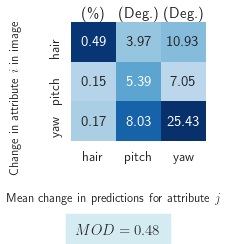

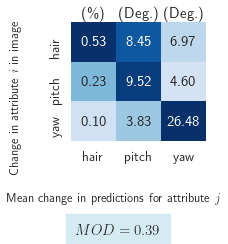

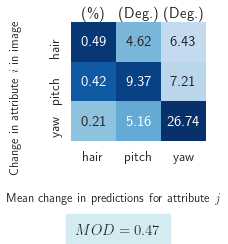

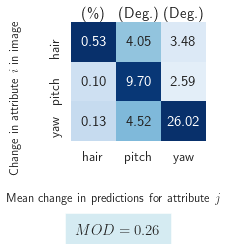

In [8]:
attributes = ['hair', 'pitch', 'yaw']
cbar_txt = ['(\%)', '(Deg.)', '(Deg.)']
sns.set(font_scale=1.25)

figsize = (3.0, 3.0)
################ babenko
plt.subplots_adjust(wspace = 0)
fig, axs = plt.subplots(1, 3, figsize=figsize)
for i in range(3):
    sns.heatmap(mat_b[:, i:i+1], annot=True,
                xticklabels=[attributes[i]],
                yticklabels=attributes if i == 0 else [],
                fmt=".2f",
                ax=axs[i],
                vmin=0,
                vmax=max_vals[i],
                cbar=False,
                cmap='Blues'
               )
    axs[i].xaxis.set_label_position('top')
    axs[i].set(xlabel=cbar_txt[i])

fig.supylabel('Change in attribute $i$ in image', fontsize='small')
fig.supxlabel('Mean change in predictions for attribute $j$', fontsize='small')

fig.tight_layout()

s = score(mat_b)
plt.text(0.0, 5.4, f'$MOD = {s}$',
        verticalalignment='bottom', horizontalalignment='right',
        bbox={'facecolor': 'lightblue', 'alpha': 0.5, 'pad': 10},
        fontsize=15)
plt.subplots_adjust(wspace = 0)
plt.savefig('./quant/figures/dis-quant-babenko.pdf', bbox_inches='tight')

################ SEFA
plt.subplots_adjust(wspace = 0)
fig, axs = plt.subplots(1, 3, figsize=figsize)
for i in range(3):
    sns.heatmap(mat_s[:, i:i+1], annot=True,
                xticklabels=[attributes[i]],
                yticklabels=attributes if i == 0 else [],
                fmt=".2f",
                ax=axs[i],
                vmin=0,
                vmax=max_vals[i],
                cbar=False,
                cmap='Blues'
               )
    axs[i].xaxis.set_label_position('top')
    axs[i].set(xlabel=cbar_txt[i])

fig.supylabel('Change in attribute $i$ in image', fontsize='small')
fig.supxlabel('Mean change in predictions for attribute $j$', fontsize='small')

fig.tight_layout()
s = score(mat_s)
plt.text(0.0, 5.4, f'$MOD = {s}$',
        verticalalignment='bottom', horizontalalignment='right',
        bbox={'facecolor': 'lightblue', 'alpha': 0.5, 'pad': 10},
        fontsize=15)
plt.subplots_adjust(wspace = 0)
plt.savefig('./quant/figures/dis-quant-sefa.pdf', bbox_inches='tight')
    
################ G SPACE
plt.subplots_adjust(wspace = 0)
fig, axs = plt.subplots(1, 3, figsize=figsize)
for i in range(3):
    sns.heatmap(mat_g[:, i:i+1], annot=True,
                xticklabels=[attributes[i]],
                yticklabels=attributes if i == 0 else [],
                fmt=".2f",
                ax=axs[i],
                vmin=0,
                vmax=max_vals[i],
                cbar=False,
                cmap='Blues'
               )
    axs[i].xaxis.set_label_position('top')
    axs[i].set(xlabel=cbar_txt[i])

fig.supylabel('Change in attribute $i$ in image', fontsize='small')
fig.supxlabel('Mean change in predictions for attribute $j$', fontsize='small')

fig.tight_layout()
s = score(mat_g)
plt.text(0.0, 5.4, f'$MOD = {s}$',
        verticalalignment='bottom', horizontalalignment='right',
        bbox={'facecolor': 'lightblue', 'alpha': 0.5, 'pad': 10},
        fontsize=15)
plt.subplots_adjust(wspace = 0)
plt.savefig('./quant/figures/dis-quant-gspace.pdf', bbox_inches='tight')


################ OURS
plt.subplots_adjust(wspace = 0)
fig, axs = plt.subplots(1, 3, figsize=figsize)
for i in range(3):
    sns.heatmap(mat[:, i:i+1], annot=True,
                xticklabels=[attributes[i]],
                yticklabels=attributes if i == 0 else [],
                fmt=".2f",
                ax=axs[i],
                vmax=max_vals[i],
                vmin=0,
                cbar=False,
                cmap='Blues'
               )
    axs[i].xaxis.set_label_position('top')
    axs[i].set(xlabel=cbar_txt[i])

fig.supylabel('Change in attribute $i$ in image', fontsize='small')
fig.supxlabel('Mean change in predictions for attribute $j$', fontsize='small')

fig.tight_layout()
s = score(mat)
plt.text(0.0, 5.4, f'$MOD = {s}$',
        verticalalignment='bottom', horizontalalignment='right',
        bbox={'facecolor': 'lightblue', 'alpha': 0.5, 'pad': 10},
        fontsize=15)
plt.subplots_adjust(wspace = 0)
plt.savefig('./quant/figures/dis-quant.pdf', bbox_inches='tight')